In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [166]:
data = pd.read_csv('database.csv')

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477732 entries, 0 to 477731
Data columns (total 29 columns):
UNIQUE KEY             477732 non-null int64
DATE                   477732 non-null object
TIME                   477732 non-null object
BOROUGH                338390 non-null object
ZIP CODE               338329 non-null float64
LATITUDE               356600 non-null float64
LONGITUDE              356600 non-null float64
LOCATION               356600 non-null object
ON STREET NAME         364552 non-null object
CROSS STREET NAME      335574 non-null object
OFF STREET NAME        58511 non-null object
PERSONS INJURED        477732 non-null int64
PERSONS KILLED         477732 non-null int64
PEDESTRIANS INJURED    477732 non-null int64
PEDESTRIANS KILLED     477732 non-null int64
CYCLISTS INJURED       477732 non-null int64
CYCLISTS KILLED        477732 non-null int64
MOTORISTS INJURED      477732 non-null int64
MOTORISTS KILLED       477732 non-null int64
VEHICLE 1 TYPE        

In [168]:
data.head()

,UNIQUE KEY,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,VEHICLE 1 TYPE,VEHICLE 2 TYPE,VEHICLE 3 TYPE,VEHICLE 4 TYPE,VEHICLE 5 TYPE,VEHICLE 1 FACTOR,VEHICLE 2 FACTOR,VEHICLE 3 FACTOR,VEHICLE 4 FACTOR,VEHICLE 5 FACTOR
0,3146911,01/01/2015,0:20,QUEENS,11358.0,40.751847,-73.787862,"(40.7518471, -73.787862)",47 AVENUE,193 STREET,...,SPORT UTILITY/STATION WAGON,NaN,NaN,NaN,NaN,TRAFFIC CONTROL DISREGARDED,NaN,NaN,NaN,NaN
1,3146180,01/01/2015,0:20,NaN,NaN,40.771289,-73.946693,"(40.7712888, -73.9466928)",NaN,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,ANIMALS ACTION,NaN,NaN,NaN,NaN
2,3146384,01/01/2015,0:21,BROOKLYN,11205.0,40.689445,-73.955121,"(40.6894449, -73.9551212)",BEDFORD AVENUE,LAFAYETTE AVENUE,...,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN,FATIGUED/DROWSY,UNSPECIFIED,NaN,NaN,NaN
3,3146013,01/01/2015,0:30,BROOKLYN,11213.0,40.673845,-73.925080,"(40.6738445, -73.9250801)",BUFFALO AVENUE,SAINT MARKS AVENUE,...,BUS,PASSENGER VEHICLE,NaN,NaN,NaN,LOST CONSCIOUSNESS,NaN,NaN,NaN,NaN
4,3146120,01/01/2015,0:33,NaN,NaN,NaN,NaN,NaN,RICHMOND TERRACE,SOUTH AVENUE,...,UNKNOWN,PASSENGER VEHICLE,NaN,NaN,NaN,UNSPECIFIED,UNSPECIFIED,NaN,NaN,NaN


In [169]:
drop_column = ['UNIQUE KEY','LOCATION','ON STREET NAME',
               'CROSS STREET NAME','OFF STREET NAME','DATE','TIME','ZIP CODE']
data_with_drop = data.drop(drop_column,axis=1)
data_with_drop.head()


,BOROUGH,LATITUDE,LONGITUDE,PERSONS INJURED,PERSONS KILLED,PEDESTRIANS INJURED,PEDESTRIANS KILLED,CYCLISTS INJURED,CYCLISTS KILLED,MOTORISTS INJURED,...,VEHICLE 1 TYPE,VEHICLE 2 TYPE,VEHICLE 3 TYPE,VEHICLE 4 TYPE,VEHICLE 5 TYPE,VEHICLE 1 FACTOR,VEHICLE 2 FACTOR,VEHICLE 3 FACTOR,VEHICLE 4 FACTOR,VEHICLE 5 FACTOR
0,QUEENS,40.751847,-73.787862,0,0,0,0,0,0,0,...,SPORT UTILITY/STATION WAGON,NaN,NaN,NaN,NaN,TRAFFIC CONTROL DISREGARDED,NaN,NaN,NaN,NaN
1,NaN,40.771289,-73.946693,1,0,0,0,0,0,1,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,ANIMALS ACTION,NaN,NaN,NaN,NaN
2,BROOKLYN,40.689445,-73.955121,0,0,0,0,0,0,0,...,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN,FATIGUED/DROWSY,UNSPECIFIED,NaN,NaN,NaN
3,BROOKLYN,40.673845,-73.925080,0,0,0,0,0,0,0,...,BUS,PASSENGER VEHICLE,NaN,NaN,NaN,LOST CONSCIOUSNESS,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0,0,0,0,0,0,0,...,UNKNOWN,PASSENGER VEHICLE,NaN,NaN,NaN,UNSPECIFIED,UNSPECIFIED,NaN,NaN,NaN


In [170]:
data_with_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477732 entries, 0 to 477731
Data columns (total 21 columns):
BOROUGH                338390 non-null object
LATITUDE               356600 non-null float64
LONGITUDE              356600 non-null float64
PERSONS INJURED        477732 non-null int64
PERSONS KILLED         477732 non-null int64
PEDESTRIANS INJURED    477732 non-null int64
PEDESTRIANS KILLED     477732 non-null int64
CYCLISTS INJURED       477732 non-null int64
CYCLISTS KILLED        477732 non-null int64
MOTORISTS INJURED      477732 non-null int64
MOTORISTS KILLED       477732 non-null int64
VEHICLE 1 TYPE         473777 non-null object
VEHICLE 2 TYPE         396795 non-null object
VEHICLE 3 TYPE         30264 non-null object
VEHICLE 4 TYPE         6831 non-null object
VEHICLE 5 TYPE         1683 non-null object
VEHICLE 1 FACTOR       474483 non-null object
VEHICLE 2 FACTOR       415401 non-null object
VEHICLE 3 FACTOR       31638 non-null object
VEHICLE 4 FACTOR       7232

In [171]:
'''
data_categorical = data_with_drop
categorical_values = ['BOROUGH','VEHICLE 1 TYPE','VEHICLE 2 TYPE','VEHICLE 3 TYPE','VEHICLE 4 TYPE','VEHICLE 5 TYPE',
                     'VEHICLE 1 FACTOR','VEHICLE 2 FACTOR','VEHICLE 3 FACTOR','VEHICLE 4 FACTOR','VEHICLE 5 FACTOR']

for col_name in categorical_values:
    data_categorical[col_name].fillna('NaN',inplace=True)
    print(data_categorical[col_name].unique())
    for unique_value in data_categorical[col_name].unique():
        temp = (data_categorical[col_name] == unique_value).astype(int)
      
        data_categorical['onehot_{}={}'.format(col_name, unique_value).replace(' ','_')] = temp
'''

"\ndata_categorical = data_with_drop\ncategorical_values = ['BOROUGH','VEHICLE 1 TYPE','VEHICLE 2 TYPE','VEHICLE 3 TYPE','VEHICLE 4 TYPE','VEHICLE 5 TYPE',\n                     'VEHICLE 1 FACTOR','VEHICLE 2 FACTOR','VEHICLE 3 FACTOR','VEHICLE 4 FACTOR','VEHICLE 5 FACTOR']\n\nfor col_name in categorical_values:\n    data_categorical[col_name].fillna('NaN',inplace=True)\n    print(data_categorical[col_name].unique())\n    for unique_value in data_categorical[col_name].unique():\n        temp = (data_categorical[col_name] == unique_value).astype(int)\n      \n        data_categorical['onehot_{}={}'.format(col_name, unique_value).replace(' ','_')] = temp\n"

In [172]:
from sklearn.preprocessing import LabelEncoder

data_categorical = data_with_drop.copy()
categorical_values = ['BOROUGH','VEHICLE 1 TYPE','VEHICLE 2 TYPE','VEHICLE 3 TYPE','VEHICLE 4 TYPE','VEHICLE 5 TYPE',
                     'VEHICLE 1 FACTOR','VEHICLE 2 FACTOR','VEHICLE 3 FACTOR','VEHICLE 4 FACTOR','VEHICLE 5 FACTOR']
categorical_encoders = []
for col_name in categorical_values:
    data_categorical[col_name].fillna('UNKNOWN',inplace=True)
    encoder = LabelEncoder().fit(data_categorical[col_name])
    data_categorical[col_name] = pd.Series(encoder.fit_transform(data_categorical[col_name]))
    categorical_encoders.append(encoder)
   

In [173]:
data_categorical.head()

,BOROUGH,LATITUDE,LONGITUDE,PERSONS INJURED,PERSONS KILLED,PEDESTRIANS INJURED,PEDESTRIANS KILLED,CYCLISTS INJURED,CYCLISTS KILLED,MOTORISTS INJURED,...,VEHICLE 1 TYPE,VEHICLE 2 TYPE,VEHICLE 3 TYPE,VEHICLE 4 TYPE,VEHICLE 5 TYPE,VEHICLE 1 FACTOR,VEHICLE 2 FACTOR,VEHICLE 3 FACTOR,VEHICLE 4 FACTOR,VEHICLE 5 FACTOR
0,3,40.751847,-73.787862,0,0,0,0,0,0,0,...,13,15,15,15,11,41,43,38,36,25
1,5,40.771289,-73.946693,1,0,0,0,0,0,1,...,8,15,15,15,11,3,43,38,36,25
2,1,40.689445,-73.955121,0,0,0,0,0,0,0,...,8,15,15,15,11,14,46,38,36,25
3,1,40.673845,-73.925080,0,0,0,0,0,0,0,...,2,8,15,15,11,21,43,38,36,25
4,5,NaN,NaN,0,0,0,0,0,0,0,...,15,8,15,15,11,46,46,38,36,25


In [174]:
import sklearn

In [175]:
data_categorical.dropna(inplace=True)
data['VEHICLE 1 TYPE'].unique()

array(['SPORT UTILITY/STATION WAGON', 'PASSENGER VEHICLE', 'BUS',
       'UNKNOWN', 'TAXI', 'VAN', 'FIRE TRUCK', 'OTHER',
       'LARGE COM VEH(6 OR MORE TIRES)', 'LIVERY VEHICLE', 'SCOOTER',
       'PICK-UP TRUCK', 'AMBULANCE', 'SMALL COM VEH(4 TIRES)',
       'MOTORCYCLE', 'BICYCLE', nan, 'PEDICAB'], dtype=object)

In [176]:
data_categorical.head()

,BOROUGH,LATITUDE,LONGITUDE,PERSONS INJURED,PERSONS KILLED,PEDESTRIANS INJURED,PEDESTRIANS KILLED,CYCLISTS INJURED,CYCLISTS KILLED,MOTORISTS INJURED,...,VEHICLE 1 TYPE,VEHICLE 2 TYPE,VEHICLE 3 TYPE,VEHICLE 4 TYPE,VEHICLE 5 TYPE,VEHICLE 1 FACTOR,VEHICLE 2 FACTOR,VEHICLE 3 FACTOR,VEHICLE 4 FACTOR,VEHICLE 5 FACTOR
0,3,40.751847,-73.787862,0,0,0,0,0,0,0,...,13,15,15,15,11,41,43,38,36,25
1,5,40.771289,-73.946693,1,0,0,0,0,0,1,...,8,15,15,15,11,3,43,38,36,25
2,1,40.689445,-73.955121,0,0,0,0,0,0,0,...,8,15,15,15,11,14,46,38,36,25
3,1,40.673845,-73.925080,0,0,0,0,0,0,0,...,2,8,15,15,11,21,43,38,36,25
5,1,40.656684,-73.929896,2,0,0,0,0,0,2,...,8,13,13,8,11,46,46,41,39,25


In [177]:
data_categorical.corr()

,BOROUGH,LATITUDE,LONGITUDE,PERSONS INJURED,PERSONS KILLED,PEDESTRIANS INJURED,PEDESTRIANS KILLED,CYCLISTS INJURED,CYCLISTS KILLED,MOTORISTS INJURED,...,VEHICLE 1 TYPE,VEHICLE 2 TYPE,VEHICLE 3 TYPE,VEHICLE 4 TYPE,VEHICLE 5 TYPE,VEHICLE 1 FACTOR,VEHICLE 2 FACTOR,VEHICLE 3 FACTOR,VEHICLE 4 FACTOR,VEHICLE 5 FACTOR
BOROUGH,1.000000,-0.053614,0.008753,0.012466,0.003899,-0.062125,-0.000511,-0.044107,-0.001771,0.062939,...,0.018841,-0.008408,-0.061468,-0.021380,-0.005171,-0.086935,-0.010741,-0.006085,-0.009781,-0.005677
LATITUDE,-0.053614,1.000000,-0.604964,-0.005036,-0.000902,0.002901,-0.000539,0.000607,-0.000346,-0.007048,...,-0.001150,0.002797,0.003860,0.001494,0.000090,0.004263,-0.012317,-0.003114,-0.001166,-0.000971
LONGITUDE,0.008753,-0.604964,1.000000,0.006279,0.000080,-0.001409,-0.000020,-0.003532,-0.000299,0.008886,...,-0.003609,-0.004039,-0.004146,-0.002469,-0.000957,0.002902,0.004014,-0.000029,0.000259,-0.000026
PERSONS INJURED,0.012466,-0.005036,0.006279,1.000000,0.017111,0.292853,0.002209,0.169707,0.002236,0.877398,...,-0.006818,-0.016412,-0.135117,-0.097189,-0.062855,-0.020313,-0.002551,-0.001598,0.000618,-0.003044
PERSONS KILLED,0.003899,-0.000902,0.000080,0.017111,1.000000,0.001442,0.729767,-0.002871,0.266076,0.018388,...,-0.002525,0.015743,-0.002603,-0.009774,-0.009938,0.001212,0.003058,0.001138,0.002345,0.003937
PEDESTRIANS INJURED,-0.062125,0.002901,-0.001409,0.292853,0.001442,1.000000,0.005714,-0.026499,-0.001870,-0.050426,...,0.053561,0.247767,0.039444,0.016179,0.009021,-0.019649,0.032960,-0.001643,-0.001612,-0.002837
PEDESTRIANS KILLED,-0.000511,-0.000539,-0.000020,0.002209,0.729767,0.005714,1.000000,-0.003176,-0.000202,0.000881,...,0.002923,0.025158,0.003528,-0.000201,-0.000602,-0.001118,0.003670,-0.000845,0.001182,0.001314
CYCLISTS INJURED,-0.044107,0.000607,-0.003532,0.169707,-0.002871,-0.026499,-0.003176,1.000000,0.003273,-0.035615,...,-0.023426,-0.301174,0.008931,0.004118,0.005454,-0.005930,-0.009107,-0.002123,-0.001335,0.000321
CYCLISTS KILLED,-0.001771,-0.000346,-0.000299,0.002236,0.266076,-0.001870,-0.000202,0.003273,1.000000,0.002001,...,-0.005930,-0.015942,-0.005708,-0.008695,-0.005904,0.000712,0.001011,0.001293,0.001889,0.001862
MOTORISTS INJURED,0.062939,-0.007048,0.008886,0.877398,0.018388,-0.050426,0.000881,-0.035615,0.002001,1.000000,...,-0.020936,-0.040115,-0.161054,-0.115221,-0.073167,-0.011938,-0.011943,0.001789,0.001712,-0.002625


Populating the interactive namespace from numpy and matplotlib


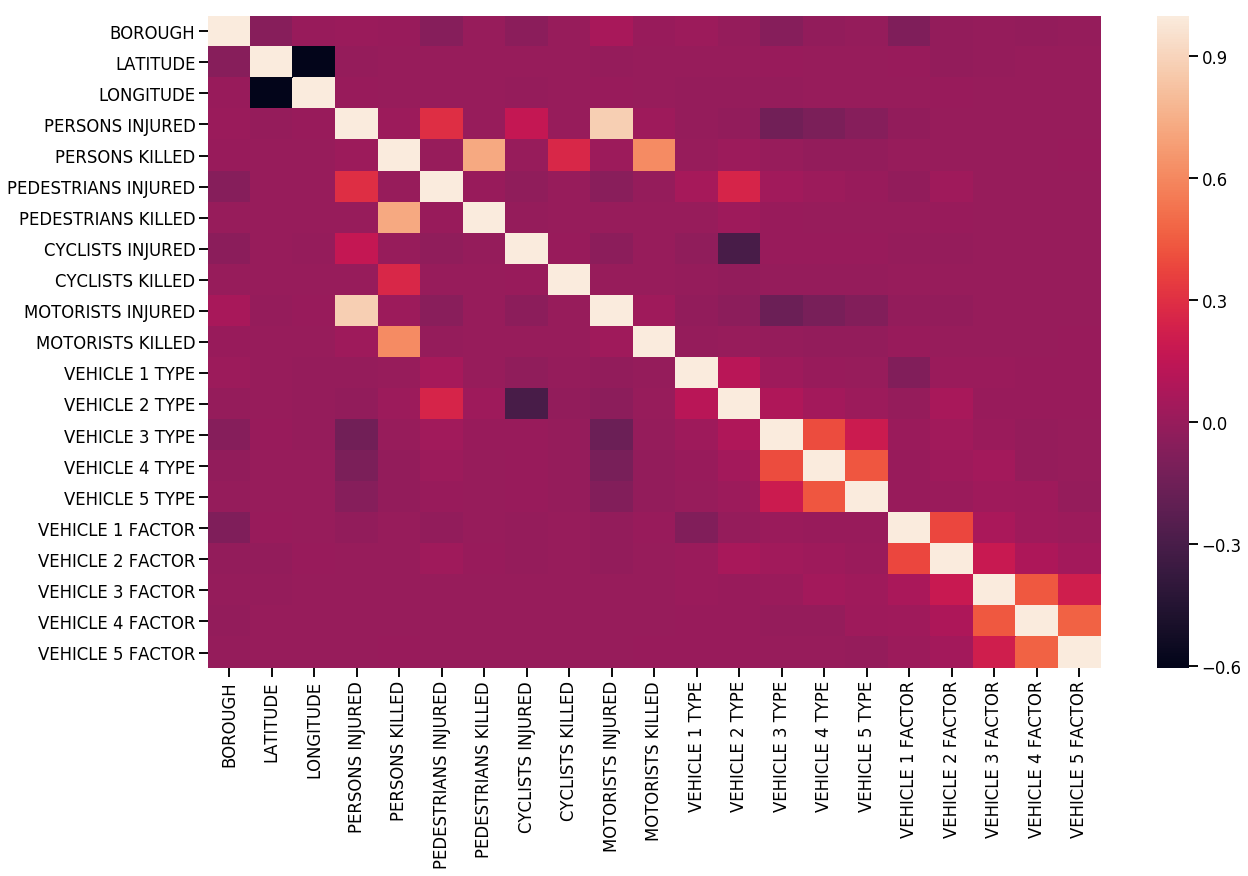

In [178]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 12)

import seaborn as sns
sns.set_context('talk')
corr = data_categorical.corr()

sns.heatmap(corr)

In [179]:
corr_drop = ['MOTORISTS INJURED','PEDESTRIANS KILLED']
data_categorical.drop(corr_drop,axis=1,inplace=True)

In [180]:
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356600 entries, 0 to 477731
Data columns (total 19 columns):
BOROUGH                356600 non-null int64
LATITUDE               356600 non-null float64
LONGITUDE              356600 non-null float64
PERSONS INJURED        356600 non-null int64
PERSONS KILLED         356600 non-null int64
PEDESTRIANS INJURED    356600 non-null int64
CYCLISTS INJURED       356600 non-null int64
CYCLISTS KILLED        356600 non-null int64
MOTORISTS KILLED       356600 non-null int64
VEHICLE 1 TYPE         356600 non-null int64
VEHICLE 2 TYPE         356600 non-null int64
VEHICLE 3 TYPE         356600 non-null int64
VEHICLE 4 TYPE         356600 non-null int64
VEHICLE 5 TYPE         356600 non-null int64
VEHICLE 1 FACTOR       356600 non-null int64
VEHICLE 2 FACTOR       356600 non-null int64
VEHICLE 3 FACTOR       356600 non-null int64
VEHICLE 4 FACTOR       356600 non-null int64
VEHICLE 5 FACTOR       356600 non-null int64
dtypes: float64(2), int64(17)


In [181]:
from sklearn.decomposition import PCA

p = PCA(n_components=2)

pd = p.fit_transform(data_categorical)


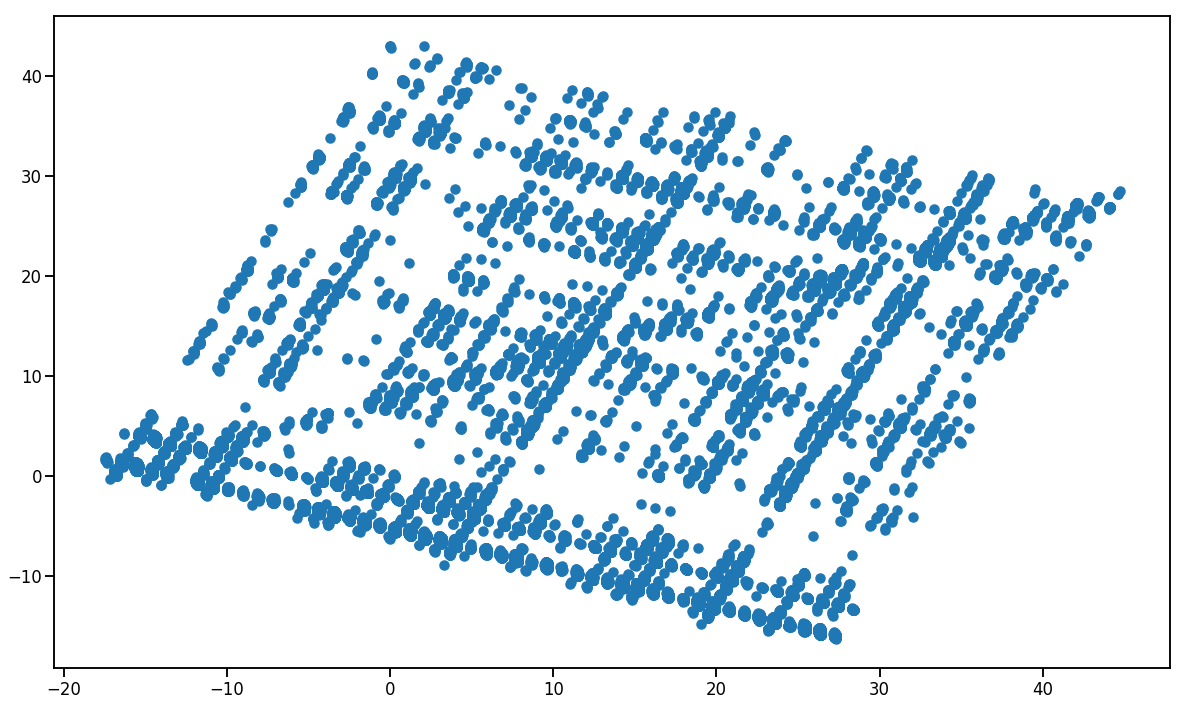

In [182]:
plt.scatter(pd[:,0],pd[:,1])

## lab2

In [183]:
n_clusters=10
km = KMeans(n_clusters=n_clusters).fit(data_categorical)

In [184]:
data_after_clustering = data_categorical
data_after_clustering['label'] = km.labels_

In [185]:
from sklearn.model_selection import train_test_split
y = data_after_clustering['label'].T
X = data_after_clustering.drop('label',axis=1)


## lab3

In [186]:
import keras

In [187]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)

In [188]:
# create model
model = Sequential()
model.add(Dense(100, input_dim=X.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_clusters, activation='sigmoid'))

In [189]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [197]:
y = np.array([np.array(np.eye(n_clusters)[label]) for label in km.labels_])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [191]:
# Fit the model
keras_model = model.fit(X, y, epochs=1, batch_size=10)

Epoch 1/1
356600/356600 [==============================] - 46s 128us/step - loss: 0.0415 - acc: 0.9945


In [198]:
model.evaluate(X_train,y_train)

249620/249620 [==============================] - 3s 14us/step


[0.004967376083015451, 0.9978038572365346]